# Dimensionality Reduction with PCA and LDA

#### Garrett McCue


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import plotly.express as px

sns.set_style("white")
sns.set_context("notebook", font_scale=1.2) #set theme for visualizations
%matplotlib inline

![](https://miro.medium.com/max/1400/1*vXQ5sgMF0XmiY4Jc6gJVwA.png)
### Table of Contents

* [1. Data](#data)
    * [1.1 Load Data](#load-data)
    * [1.2 EDA](#eda)
* [2. PCA](#pca)
    * [2.1 What is PCA?](#what_is_pca)
    * [2.2 PCA Logic](#pca-logic)
    * [2.3 Applying PCA](#applying-pca)
    * [2.4 PCA Results](#pca-results)
        * [2.4.1 1D Projection](#pca1)
        * [2.4.2 2D Projection](#pca2)
        * [2.4.3 3D Projection](#pca3)
    * [2.5 PCA Analysis](#pca-analysis)
* [3. LDA](#lda)
    * [3.1 What is LDA?](#what-is-lda)
    * [3.2 LDA Logic](#lda-logic)
    * [3.3 Applying LDA](#applying-lda)
    * [3.4 LDA Results](#lda-results)
    * [3.5 LDA Analysis](#lda-analysis)
* [4. Conclusion](#conclusion)
* [5. Full Code](#code)

#### Aims:
1. Apply PCA as a dimensionality reduction technique.
2. Apply Linear Discriminate Analysis (LDA) as a dimensionality reduction technique.




## 1. Data<a class="anchor" id="data"></a>

The dataset that will be used to implement the two dimensionality reduction techniques is the [Stellar Classification Dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) from Kaggle. 
The context of the data, as reported by the dataset, is quoted from Kaggle as
> In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

The dataset consits of `100,000` observations from the [Sloan Digital Sky Survey](https://www.sdss.org/). Each observation has `17 features` columns and belongs to one of `3 classes` which are either a `star`, `galaxy`, or `quasar`. The goal of the assignment is to use `PCA` and `LDA` to reduce the dimensionality of the dataset. 


### 1.1 Load Data<a class="anchor" id="load-data"></a>

In [2]:
DATA = "data/star_classification.csv"
df = pd.read_csv(DATA)
df.shape

(100000, 18)

### 1.2 EDA<a class="anchor" id="eda"></a>
we are going to drop the obj_ID', 'run_ID','rerun_ID', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'cam_col', 'plate' from the dataset, becasue they are identifiers from the Sloan Digital Sky Survey and are not apart of the stellar classification process. 

In [3]:
columns = ['obj_ID', 'run_ID','rerun_ID', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'cam_col', 'plate']
df = df.drop(columns=columns)
df.head()


,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


In [4]:
# analyze data at a high level
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.0,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.0,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.0,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.0,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.0,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.0,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
redshift,100000.0,0.576661,0.730707,-0.009971,0.054517,0.424173,0.704154,7.011245


In [5]:
# see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


We see that all columns conatin numerical data(float64) besides the class column, which contains objects. The objects in this column correspond to one of the three classes that each observation belongs to. Lets see what classes the observations are grouped into.....

/Users/garrettmccue/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


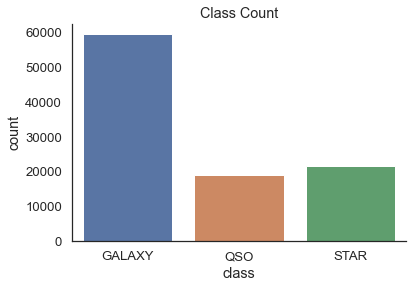

In [6]:
# plot the number of observations within each class
sns.countplot(df['class'], palette="deep")
sns.despine()
plt.title("Class Count")

plt.show()

The goal of the assignment is to apply dimensionality reduction techniques in order to project the classes into a lower dimension, which can lower the computational need and aid in classification of new samples. 


## 2. PCA<a class="anchor" id="pca"></a>



### 2.1 What is PCA<a class="anchor" id="what_is_pca"></a>

 Technical description of techniques


### 2.2 PCA Logic<a class="anchor" id="pca-logic"></a>

1. compute mean of each column and subtract it from titself in order to center the data 
    * `X_mean = X - np.mean(X)`
2. calculate covariance matrix from the centered data
    * `cov_matrix = np.cov(X_mean)`
3. compute eigenvectors and eigenvalues from covariance matrix
    * `eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)`
4. sort the eigenvalues and eigenvectors in decreasing order by:
    *  `np.argsort()` to sort the indices in ascending order
    *  `np.flip()` to reverse the ascending index list into the desired descending list.
5. select the largest _n_ amount of eigenvalues and eigenvectors
    * _`n`_  being the desired number of principal components
6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the mean-centered data. 
    * `X_pca = np.dot(eigenvec_subset, X_mean)`

### 2.3 Applying PCA<a class="anchor" id="applying-pca"></a>


In [7]:
# seperate features and target first
X = df.drop(columns=['class'])
classes_df = pd.DataFrame(df['class'])
print("X shape: {}\nclasses shape: {}".format(X.shape, classes_df.shape))

X shape: (100000, 8)
classes shape: (100000, 1)


1. compute mean of each column and subtract it from itself in order to center the data
    * `X_mean = X - np.mean(X)`

In [8]:
X_mean = X - np.mean(X, axis=0)

2. calculate covariance matrix from the centered data
    * `cov_matrix = np.cov(X_mean)`

In [9]:
# rowvar = True by defualt...assumes features are row-wise and obsertvations are column-wise
# set to False becasue observations are row-wise and features are column-wise
cov_mat = np.cov(X_mean, rowvar=False)

3. compute eigenvectors and eigenvalues from covariance matrix
    * `eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)`

In [10]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

4. sort the eigenvalues and eigenvectors in decreasing order
    * `np.argsort()`
    * `np.flip()`

In [11]:
# sort the index of eigenvals using argsort() and flip() to get the largest egienvals on top
eigenvals_sorted = eigen_vals[np.flip(np.argsort(eigen_vals))]
# do the same to the eigenvectors using the largest eigenvals indices
eigenvecs_sorted = eigen_vecs[:, np.flip(np.argsort(eigen_vals))]

5. select the largest _`n`_ amount of eigenvalues and take a subset of eigenvectors
    * _`n`_  being the desired number of principal components

In [12]:
# given a specified n 
# we will use n = 1 here to cast the data into a 1 dimensional space
n = 1
eigenvec_subset = eigenvecs_sorted[:,0:n] # take a slice the first element to the specified n

6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the mean-centered data. 
    * `X_pca = np.dot(eigenvec_subset, X_mean)`

In [13]:
# X_pca = np.dot(X_mean, eigenvec_subset)
X_pca = np.dot(eigenvec_subset.T, X_mean.T).T
print("Original shape of data: {}\nShape of prrojected data: {}".format(X.shape, X_pca.shape))


Original shape of data: (100000, 8)
Shape of prrojected data: (100000, 1)


We have successfully projected the 17 dimensional dataset down to a 1d representation. We can combine the code and steps from above into a function for reusablility. We will apply the PCA function to the dataset in order to view the data in 1D, 2D, and 3D projections. 

In [14]:
# create the PCA function

def PCA(X, n):
    '''
    Arguments:
        X -- df to be projected into a lower dimensional space.. shape (num examples, num features)
        n -- number of desired principal components or the number of dimensions to reduce the dataset to
            n < features 
    Returns:
        X_pca -- the new reduced data from of shape (num examples, n)
    '''
    # step 1: normalize data
    X_mean = X - np.mean(X, axis=0)

    # step 2: calcualte covariance
    cov_mat = np.cov(X_mean, rowvar=False) # False b/c observations are row-wise & features are column-wise

    # step 3: compute eigenvals and eigenvectors from covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

    # step 4: sort eigenvals index w/ argsort() and flip() to get the largest egienvals on top
    # apply the sorted indices to the eigenvectors in order to sort them in descending order
    eigenvecs_sorted = eigen_vecs[:, np.flip(np.argsort(eigen_vals))]

    # step 5: create the eigenvector subset by slicing from the first element to the specified nth element
    eigenvec_subset = eigenvecs_sorted[:,0:n]

    #step 6: project the dataset by using the dot product and eigenvector subset
    X_pca = np.dot(X_mean, eigenvec_subset)

    return X_pca


### 2.4 PCA Results<a class="anchor" id="pca-results"></a>

#### 2.4.1 1D Projection <a class="anchor" id="pca1"></a>

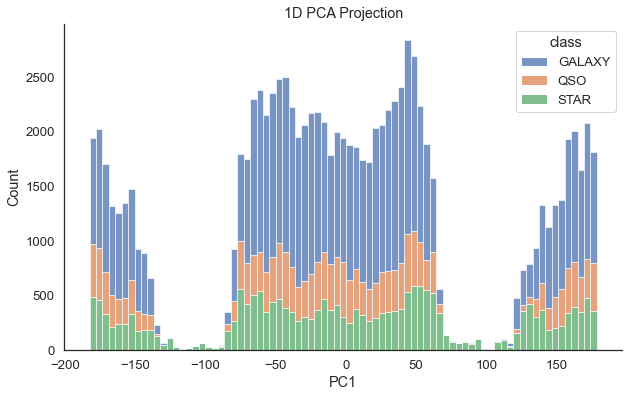

In [15]:
# create the one dimensional data and set the column to be the 1st principal component
pca_one_df = pd.DataFrame(PCA(X, 1), columns=['PC1'])
# join the classes back to the observations
pca_one_df = pd.concat([pca_one_df, classes_df], axis=1)

# plot the new df to view the class seperation
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.histplot(pca_one_df, x = 'PC1', hue = "class", multiple='stack', palette='deep')
plt.title("1D PCA Projection")
plt.show()

#### 2.4.1 2D Projection <a class="anchor" id="pca2"></a>

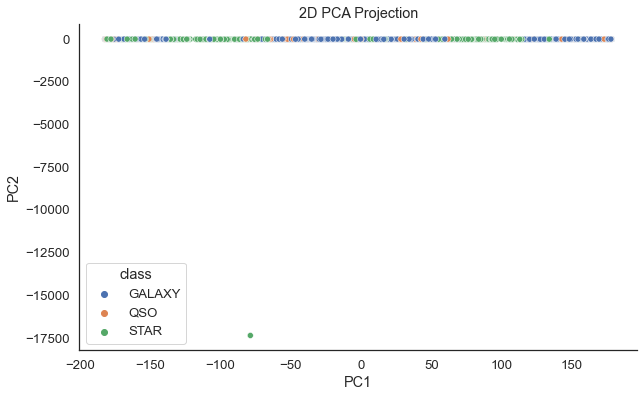

In [16]:
# 2D projection
# create the 2 dimensional data and set the columns to be the 1st and 2nd principal component
pca_two_df = pd.DataFrame(PCA(X, 2), columns=['PC1', 'PC2'])
# join the classes back to the observations
pca_two_df = pd.concat([pca_two_df, classes_df], axis=1)


# plot the new df to view the class seperation
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)
sns.scatterplot(data = pca_two_df, x = 'PC1', y = 'PC2', hue = "class", palette='deep')
plt.title("2D PCA Projection")
plt.show()

#### 2.4.1 3D Projection <a class="anchor" id="pca3"></a>

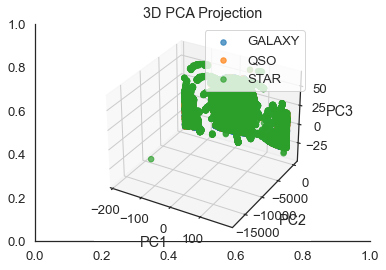

In [17]:
%matplotlib inline
# 3D projection
# create the 3 dimensional data and set the columns to be the 1st and 2nd principal component
pca_three_df = pd.DataFrame(PCA(X, 3), columns=['PC1', 'PC2', 'PC3'])
# join the classes back to the observations
pca_three_df = pd.concat([pca_three_df, classes_df], axis=1)

fig_3d, ax_3d = plt.subplots(1)
ax_3d = plt.axes(projection='3d')

groups = pca_three_df.groupby(df['class'])
for name, group in groups:
    ax_3d.scatter3D(group['PC1'], group['PC2'], group['PC3'], s=30, label=name, alpha=.7)
ax_3d.legend(loc=1)
ax_3d.set(title='3D PCA Projection', xlabel='PC1', ylabel='PC2', zlabel='PC3')
sns.despine()
plt.show()



### 2.5 PCA Analysis<a class="anchor" id="pca-analysis"></a>
An analysis of the results, i.e., did you obtain what you expected? Were there any surprises? What conclusions can you draw from the experiments? etc.

## 3. LDA<a class="anchor" id="lda"></a>


### 3.1 What is LDA<a class="anchor" id="what-is-lda"></a>
Technical description of techniques

### 3.2 LDA Logic<a class="anchor" id="lda-logic"></a>
1. Compute the within class scatter
    * `Sw = sum(np.dot((X_class - mean_class).T, (X_class - mean_class)))`
2. Compute the between class scatter `Sb`
    * `Sb = sum(class_num * np.dot((mean_class - X2_mean).T, (mean_class - X2_mean))`
3. Calculate eigenvalues and eigenvectors from (`inv_Sw` * `Sb`)
    * `Sw2 = np.dot(np.linalg.inv(Sw), Sb)`
    * `eigenvals, eigenvecs = np.linalg.eigh(Sw2)`
4. Sort the eigenvectors and eigenvalues in descending order
    * `np.argsort()`
    * `np.flip()`
5. Select the largest _n_ amount of eigenvalues and eigenvectors
6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the original data. 
    * `X_lda = np.dot(eigenvec_subset, X_mean)`

### 3.3 Applying LDA<a class="anchor" id="applying-lda"></a>


In [18]:
# seperate features and target first
X2 = np.array(df.drop(columns=['class']))
labels = np.array(df['class'])
print("X shape: {}\nlabels shape: {}".format(X.shape, labels.shape))


X shape: (100000, 8)
labels shape: (100000,)


1. Compute the within class scatter
    * `Sw = sum(np.dot((X_class - mean_class).T, (X_class - mean_class)))`
2. Compute the between class scatter `Sb`
    * `Sb = sum(class_num * (mean_class - X2_mean)**2)`

In [19]:
# unique classes
classes = np.unique(labels)
# find the mean of the dataset
X2_mean = np.mean(X2, axis=0)
# initialize the matrices for Sw and Sb of size (num_feeatures, num_features)
Sw = np.zeros((X2.shape[1], X2.shape[1]))
Sb = np.zeros((X2.shape[1], X2.shape[1]))

for c in classes:
    X_class = X2[labels == c]
    mean_class = np.mean(X_class, axis=0)
    #step1: copmute within class scatter
    class_diff = X_class - mean_class
   # Sw += np.dot(class_diff.T, class_diff)
    Sw += np.cov(X_class, rowvar=False)

    #step2: compute between class scatter
    #mean_diff = mean_class - X2_mean
    #Sb += X_class.shape[0] * np.dot(mean_diff.T, mean_diff)



3. Calculate eigenvalues and eigenvectors from (`inv_Sw` * `Sb`)
    * `Sw2 = np.dot(np.linalg.inv(Sw), Sb)`
    * `eigenvals, eigenvecs = np.linalg.eigh(Sw2)`

In [20]:
# step3a: calcualte Sw2
inv_Sw = np.linalg.inv(Sw)
Sw2 =  np.dot(inv_Sw, Sb)
# step3b: compute eigenvals and eigenvectors
eigenvals, eigenvecs = np.linalg.eigh(Sw2)


4. Sort the eigenvectors and eigenvalues in descending order
    * `np.argsort()`
    * `np.flip()`

In [21]:
# step4: Sort the eigenvectors and eigenvalues in descending order

5. Select the largest _n_ amount of eigenvalues and eigenvectors
6. transform the data into a lower dimensional space by taking the dot product of the selected subset of eigenvectors and the original data. 
    * `X_lda = np.dot(eigenvec_subset, X_mean)`

In [22]:
#step5: select the largest n amount of eigenvalues and eigenvectors

#step6: transform original data by applying the eigenvector subset from step5 to it using the dot product

### 3.4 LDA Results<a class="anchor" id="lda-results"></a>


### 3.5 LDA Analysis<a class="anchor" id="lda-analysis"></a>

## 4. Conclusion<a class="anchor" id="conclusion"></a>

## 5. Full Code<a class="anchor" id="code"></a>

In [23]:
def PCA(X, n):
    '''
    Arguments:
        X -- df to be projected into a lower dimensional space.. shape (num examples, num features)
        n -- number of desired principal components or the number of dimensions to reduce the dataset to
            n < features 
    Returns:
        X_pca -- the new reduced data from of shape (num examples, n)
    '''
    # step 1: normalize data
    X_mean = X - np.mean(X, axis=0)

    # step 2: calcualte covariance
    cov_mat = np.cov(X_mean, rowvar=False) # False b/c observations are row-wise & features are column-wise

    # step 3: compute eigenvals and eigenvectors from covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

    # step 4: sort eigenvals index w/ argsort() and flip() to get the largest egienvals on top
    # apply the dorted indices to the eigenvectors in order to sort them in descending order
    eigenvecs_sorted = eigen_vecs[:, np.flip(np.argsort(eigen_vals))]

    # step 5: create the eigenvector subset by slicing from the first element to the specified nth element
    eigenvec_subset = eigenvecs_sorted[:,0:n]

    #step 6: project the dataset by using the dot product and eigenvector subset
    X_pca = np.dot(X_mean, eigenvec_subset)

    return X_pca
